# Sales data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Sales_January_2019.csv')
df2=pd.read_csv('Sales_February_2019.csv')
df3=pd.read_csv('Sales_March_2019.csv')
df4=pd.read_csv('Sales_April_2019.csv')
df5=pd.read_csv('Sales_May_2019.csv')
df6=pd.read_csv('Sales_June_2019.csv')
df7=pd.read_csv('Sales_July_2019.csv')
df8=pd.read_csv('Sales_August_2019.csv')
df9=pd.read_csv('Sales_September_2019.csv')
df10=pd.read_csv('Sales_October_2019.csv')
df11=pd.read_csv('Sales_November_2019.csv')
df12=pd.read_csv('Sales_December_2019.csv')

### Checking whether all df contain same column name or not

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9697 entries, 0 to 9696
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9681 non-null   float64
 1   Product           9697 non-null   object 
 2   Quantity Ordered  9681 non-null   float64
 3   Price Each        9681 non-null   float64
 4   Order Date        9697 non-null   object 
 5   Purchase Address  9697 non-null   object 
dtypes: float64(3), object(3)
memory usage: 454.7+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          11986 non-null  float64
 1   Product           12004 non-null  object 
 2   Quantity Ordered  11986 non-null  float64
 3   Price Each        11986 non-null  float64
 4   Order Date        12004 non-null  object 
 5   Purchase Address  12004 non-null  object 
dtypes: float64(3), object(3)
memory usage: 562.8+ KB


### Merging all datasets into one

In [5]:
all_data=df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,01/22/19,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,01/25/19,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
24984,319666.0,Lightning Charging Cable,1.0,14.95,12/11/19,"14 Madison St, San Francisco, CA 94016"
24985,319667.0,AA Batteries (4-pack),2.0,3.84,12/01/19,"549 Willow St, Los Angeles, CA 90001"
24986,319668.0,Vareebadd Phone,1.0,400.00,12/09/19,"273 Wilson St, Seattle, WA 98101"
24987,319669.0,Wired Headphones,1.0,11.99,12/03/19,"778 River St, Dallas, TX 75001"


### Saving final dataset

In [6]:
all_data.to_csv('all_data.csv',index=False)

### Handling null values

In [7]:
all_data.isnull().sum(axis=0)

Order ID            218
Product              96
Quantity Ordered    218
Price Each          218
Order Date           96
Purchase Address     96
dtype: int64

In [8]:
# how=all and axis=0: only those those rows will be dropped in which all values are null
all_data = all_data.dropna(how='all',axis=0)
all_data.shape

(186072, 6)

In [9]:
all_data.isnull().sum(axis=0)

Order ID            122
Product               0
Quantity Ordered    122
Price Each          122
Order Date            0
Purchase Address      0
dtype: int64

### Separating Order Date into month, day and year

In [10]:
#change the name of our dataset from all_data to data
data=all_data
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,01/22/19,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,01/25/19,"387 10th St, Austin, TX 73301"


In [11]:
date=data['Order Date'].str.split('/',expand=True)
date.columns=['Month','Day','Year']
date.head()

,Month,Day,Year
0,01,22,19
1,01,28,19
2,01,17,19
3,01,05,19
4,01,25,19


In [12]:
data=pd.concat([data,date],axis=1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,141234.0,iPhone,1.0,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",01,22,19
1,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19,"185 Maple St, Portland, OR 97035",01,28,19
2,141236.0,Wired Headphones,2.0,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",01,17,19
3,141237.0,27in FHD Monitor,1.0,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",01,05,19
4,141238.0,Wired Headphones,1.0,11.99,01/25/19,"387 10th St, Austin, TX 73301",01,25,19


### Creating a 'Sales' column


##### (Sales=Quantity Ordered * Price Each)

In [13]:
data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Day                  object
Year                 object
dtype: object

In [14]:
# data['Month']=data['Month'].astype(int)
# giving error

In [15]:
data['Month'].unique()

array(['01', 'Order', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12'], dtype=object)

In [16]:
# filter and remove rows containing 'order' in 'Month' column
filter=data['Month']=='Order'
data=data[~filter]

In [17]:
data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Day                  object
Year                 object
dtype: object

In [18]:
data['Month']=data['Month'].astype(int)

In [19]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(int)
data['Price Each']=data['Price Each'].astype(float)

In [20]:
data.dtypes

Order ID            float64
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Day                  object
Year                 object
dtype: object

In [21]:
data['Sales']=data['Quantity Ordered']*data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,141234.0,iPhone,1,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",1,22,19,700.00
1,141235.0,Lightning Charging Cable,1,14.95,01/28/19,"185 Maple St, Portland, OR 97035",1,28,19,14.95
2,141236.0,Wired Headphones,2,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",1,17,19,23.98
3,141237.0,27in FHD Monitor,1,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",1,05,19,149.99
4,141238.0,Wired Headphones,1,11.99,01/25/19,"387 10th St, Austin, TX 73301",1,25,19,11.99


### Analyzing monthly sales

In [22]:
sales=data.groupby('Month')['Sales'].sum()
sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

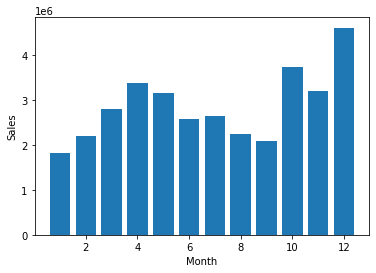

In [23]:
months=range(1,13)
plt.bar(months,sales)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Q. Which city has maximum order?

#### Creating a city column

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,141234.0,iPhone,1,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",1,22,19,700.00
1,141235.0,Lightning Charging Cable,1,14.95,01/28/19,"185 Maple St, Portland, OR 97035",1,28,19,14.95
2,141236.0,Wired Headphones,2,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",1,17,19,23.98
3,141237.0,27in FHD Monitor,1,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",1,05,19,149.99
4,141238.0,Wired Headphones,1,11.99,01/25/19,"387 10th St, Austin, TX 73301",1,25,19,11.99


In [25]:
'944 Walnut St, Boston, MA 02215'.split(',')

['944 Walnut St', ' Boston', ' MA 02215']

In [26]:
def city(x):
    return x.split(',')[1]

data['City']=data['Purchase Address'].apply(city)

In [27]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City
0,141234.0,iPhone,1,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",1,22,19,700.00,Boston
1,141235.0,Lightning Charging Cable,1,14.95,01/28/19,"185 Maple St, Portland, OR 97035",1,28,19,14.95,Portland
2,141236.0,Wired Headphones,2,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",1,17,19,23.98,San Francisco
3,141237.0,27in FHD Monitor,1,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",1,05,19,149.99,Los Angeles
4,141238.0,Wired Headphones,1,11.99,01/25/19,"387 10th St, Austin, TX 73301",1,25,19,11.99,Austin


In [28]:
data.groupby('City')['City'].count()

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: City, dtype: int64

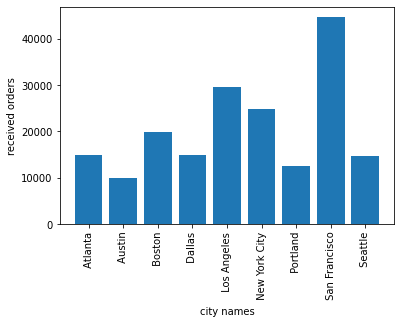

In [29]:
plt.bar(data.groupby('City')['City'].count().index,data.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

# data.groupby('City')['City'].count().plot.bar()

 ### Q: Which product sold the most and why?

In [30]:
data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int32

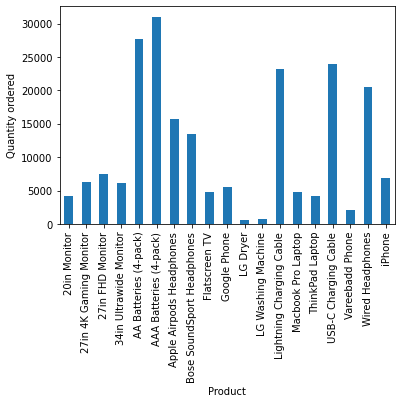

In [31]:
data.groupby('Product')['Quantity Ordered'].sum().plot.bar()
plt.ylabel('Quantity ordered')
plt.show()

In [32]:
data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### Q. What products are often most sold together

In [33]:
# DataFrame.duplicated(subset=None, keep='first')[source]
# Return boolean Series denoting duplicate rows.

# Considering certain columns is optional.

# Parameters
# subsetcolumn label or sequence of labels, optional
# Only consider certain columns for identifying duplicates, by default use all of the columns.

# keep{‘first’, ‘last’, False}, default ‘first’
# Determines which duplicates (if any) to mark.

# first : Mark duplicates as True except for the first occurrence.

# last : Mark duplicates as True except for the last occurrence.

# False : Mark all duplicates as True.
#     

In [34]:
df=data[data['Order ID'].duplicated(keep=False)]
df.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City
41,141275.0,USB-C Charging Cable,1,11.95,01/07/19,"610 Walnut St, Austin, TX 73301",1,07,19,11.95,Austin
42,141275.0,Wired Headphones,1,11.99,01/07/19,"610 Walnut St, Austin, TX 73301",1,07,19,11.99,Austin
57,141290.0,Apple Airpods Headphones,1,150.00,01/02/19,"4 1st St, Los Angeles, CA 90001",1,02,19,150.00,Los Angeles
58,141290.0,AA Batteries (4-pack),3,3.84,01/02/19,"4 1st St, Los Angeles, CA 90001",1,02,19,11.52,Los Angeles
133,141365.0,Vareebadd Phone,1,400.00,01/10/19,"20 Dogwood St, New York City, NY 10001",1,10,19,400.00,New York City
134,141365.0,Wired Headphones,1,11.99,01/10/19,"20 Dogwood St, New York City, NY 10001",1,10,19,11.99,New York City


In [35]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\abhik\AppData\Local\Temp/ipykernel_20544/2345761670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City,Grouped
41,141275.0,USB-C Charging Cable,1,11.95,01/07/19,"610 Walnut St, Austin, TX 73301",1,07,19,11.95,Austin,"USB-C Charging Cable,Wired Headphones"
42,141275.0,Wired Headphones,1,11.99,01/07/19,"610 Walnut St, Austin, TX 73301",1,07,19,11.99,Austin,"USB-C Charging Cable,Wired Headphones"
57,141290.0,Apple Airpods Headphones,1,150.00,01/02/19,"4 1st St, Los Angeles, CA 90001",1,02,19,150.00,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290.0,AA Batteries (4-pack),3,3.84,01/02/19,"4 1st St, Los Angeles, CA 90001",1,02,19,11.52,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365.0,Vareebadd Phone,1,400.00,01/10/19,"20 Dogwood St, New York City, NY 10001",1,10,19,400.00,New York City,"Vareebadd Phone,Wired Headphones"


In [37]:
#lets drop out all duplicate Order ID
df1 = df.drop_duplicates(subset=['Order ID'])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City,Grouped
41,141275.0,USB-C Charging Cable,1,11.95,01/07/19,"610 Walnut St, Austin, TX 73301",1,07,19,11.95,Austin,"USB-C Charging Cable,Wired Headphones"
57,141290.0,Apple Airpods Headphones,1,150.00,01/02/19,"4 1st St, Los Angeles, CA 90001",1,02,19,150.00,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365.0,Vareebadd Phone,1,400.00,01/10/19,"20 Dogwood St, New York City, NY 10001",1,10,19,400.00,New York City,"Vareebadd Phone,Wired Headphones"
153,141384.0,Google Phone,1,600.00,01/03/19,"223 Jackson St, Boston, MA 02215",1,03,19,600.00,Boston,"Google Phone,USB-C Charging Cable"
220,141450.0,Google Phone,1,600.00,01/12/19,"521 Park St, San Francisco, CA 94016",1,12,19,600.00,San Francisco,"Google Phone,Bose SoundSport Headphones"


In [38]:
# value_counts() returns object containing counts of unique values in descending order
df1['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                                882
Google Phone,USB-C Charging Cable                                              856
iPhone,Wired Headphones                                                        361
Vareebadd Phone,USB-C Charging Cable                                           312
Google Phone,Wired Headphones                                                  303
                                                                              ... 
Google Phone,USB-C Charging Cable,USB-C Charging Cable                           1
ThinkPad Laptop,27in 4K Gaming Monitor                                           1
iPhone,Google Phone                                                              1
Vareebadd Phone,27in FHD Monitor                                                 1
Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones      1
Name: Grouped, Length: 366, dtype: int64

In [39]:
# values and labels for plotting pie chart
values=df1['Grouped'].value_counts()[0:5]
prod_labels=df1['Grouped'].value_counts()[0:5].index

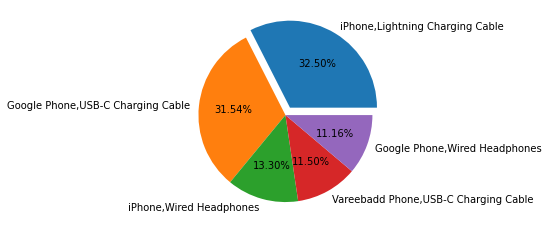

In [43]:
plt.pie(values,labels=prod_labels,autopct='%0.2f%%',explode=[0.1,0,0,0,0])
plt.show()

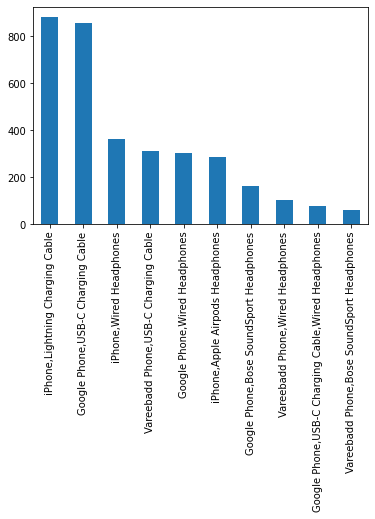

In [41]:
df1['Grouped'].value_counts()[0:10].plot.bar()
plt.show()